In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [35]:
df = pd.read_csv("vgsales.csv")

## Viewing Dataset

In [36]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Cleaning Dataset

## 1) Checking for Null values

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Before filling null values
- In Year coloumn 16327 values are not null thus 16598-16327 = 271 values are null 
- similarly in Publisher coloumn 16598-16540 = 58 values are null

In [38]:
df = df.ffill()
# filling null cells with the value of next cell

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### After filling null cells
all coloumns have 16598-16598 = 0 null values

## 2) Checking for Duplicate Values

In [40]:
len(df["Name"].unique()),df["Name"].unique()

(11493,
 array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
        'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
       dtype=object))

### 11493:unique Names , total Names:16598 , duplicate Names:5105

## Removing Duplicate Values

In [41]:
df = df.drop_duplicates()

In [42]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Stats of the Dataset

In [43]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.409326,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.820108,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


- Thus we have data from the year 1980 to 2020 
- The max global sales is 82.74 and min is 0.01

## visualizing Data

### sales vs year

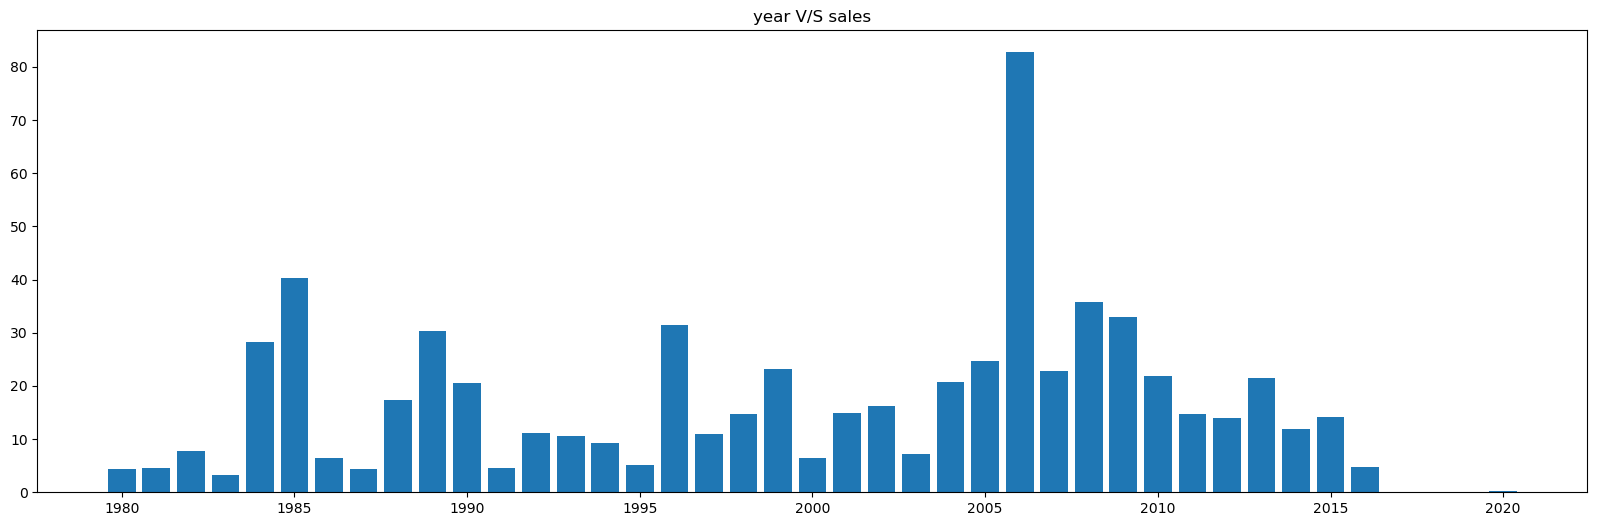

In [59]:
plt.figure(figsize=(20,6))
plt.bar(df["Year"],df["Global_Sales"])
plt.title("year V/S sales")
plt.show()

Thus we can infer that max amount of sale has been in the year 2006

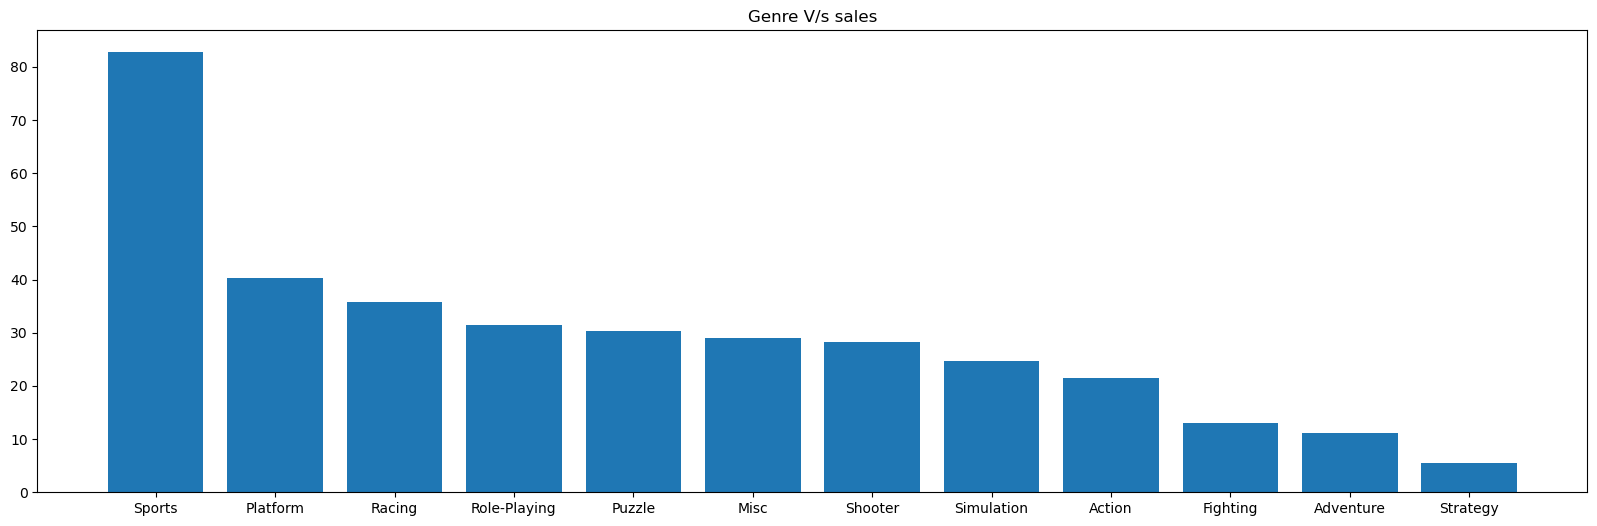

In [60]:
plt.figure(figsize=(20,6))
plt.bar(df["Genre"],df["Global_Sales"])
plt.title("Genre V/s sales")
plt.show()

We can infer from the above graph that the most popular Genre of video games is Sports

## Viewing Trend of 3-Different Genre

In [132]:
sp =df[df["Genre"]=="Sports"]

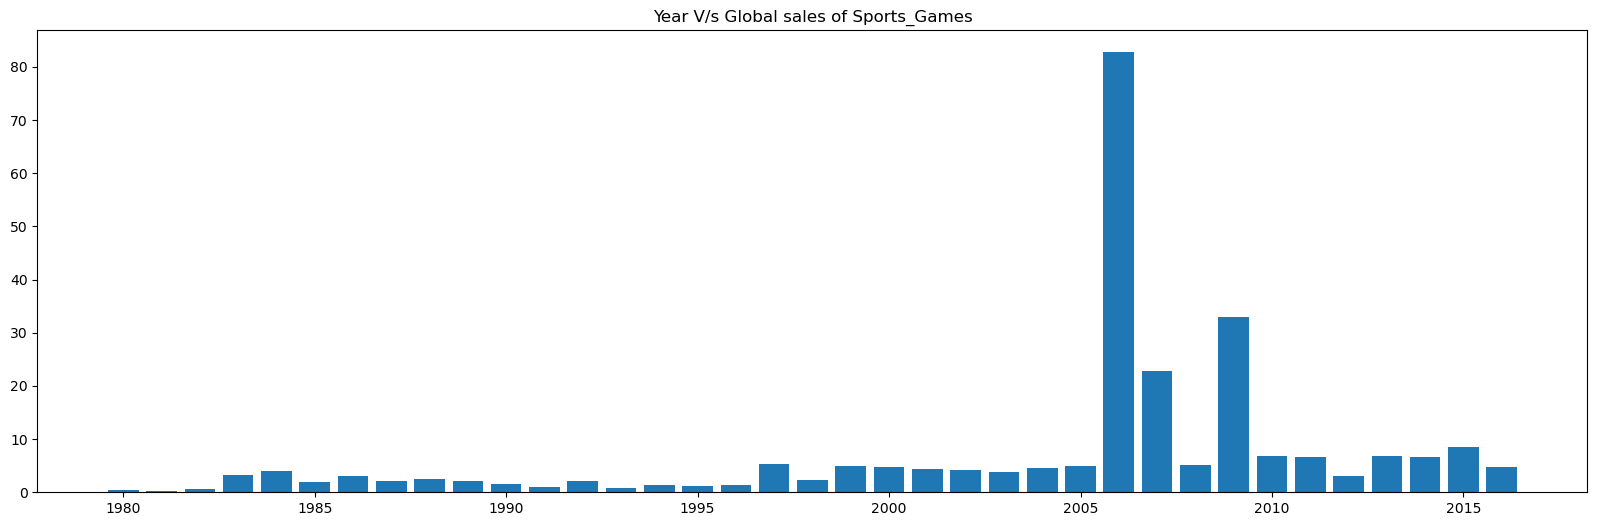

In [143]:
plt.figure(figsize=(20,6))
plt.bar(sp["Year"],sp["Global_Sales"])
plt.title("Year V/s Global sales of Sports_Games")
plt.show()

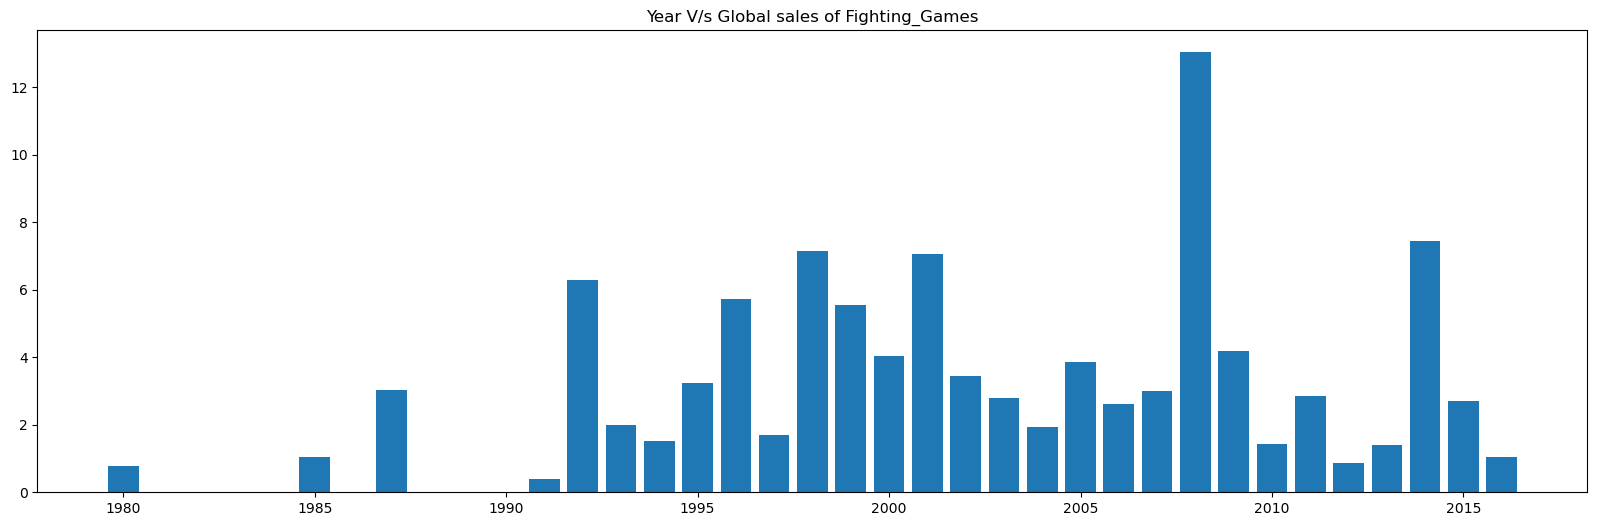

In [144]:
fi = df[df["Genre"]=="Fighting"]
plt.figure(figsize=(20,6))
plt.bar(fi["Year"],fi["Global_Sales"])
plt.title("Year V/s Global sales of Fighting_Games")
plt.show()

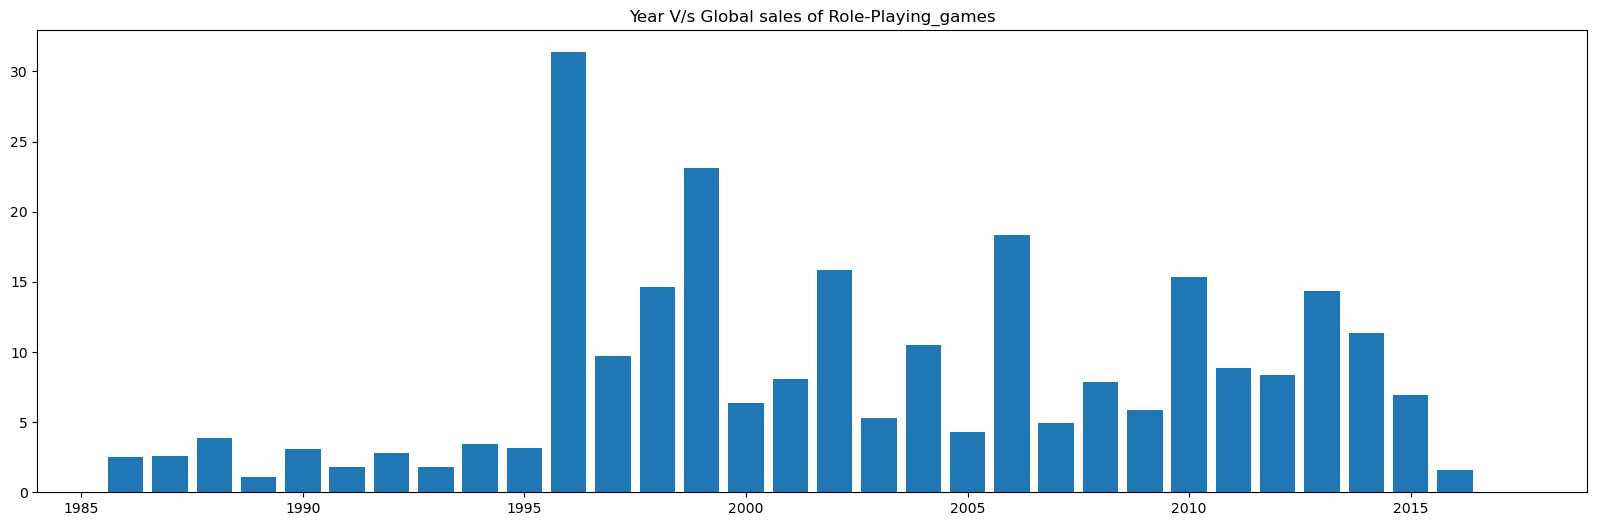

In [142]:
rl = df[df["Genre"]=="Role-Playing"]
plt.figure(figsize=(20,6))
plt.bar(rl["Year"],rl["Global_Sales"])
plt.title("Year V/s Global sales of Role-Playing_games")
plt.show()

## Visualizing Trends of Consoles

This can be done by seeing how many games have been sold for it

In [146]:
len(df["Platform"].unique()),df["Platform"].unique()

(31,
 array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
        '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
        'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
        '3DO', 'GG', 'PCFX'], dtype=object))

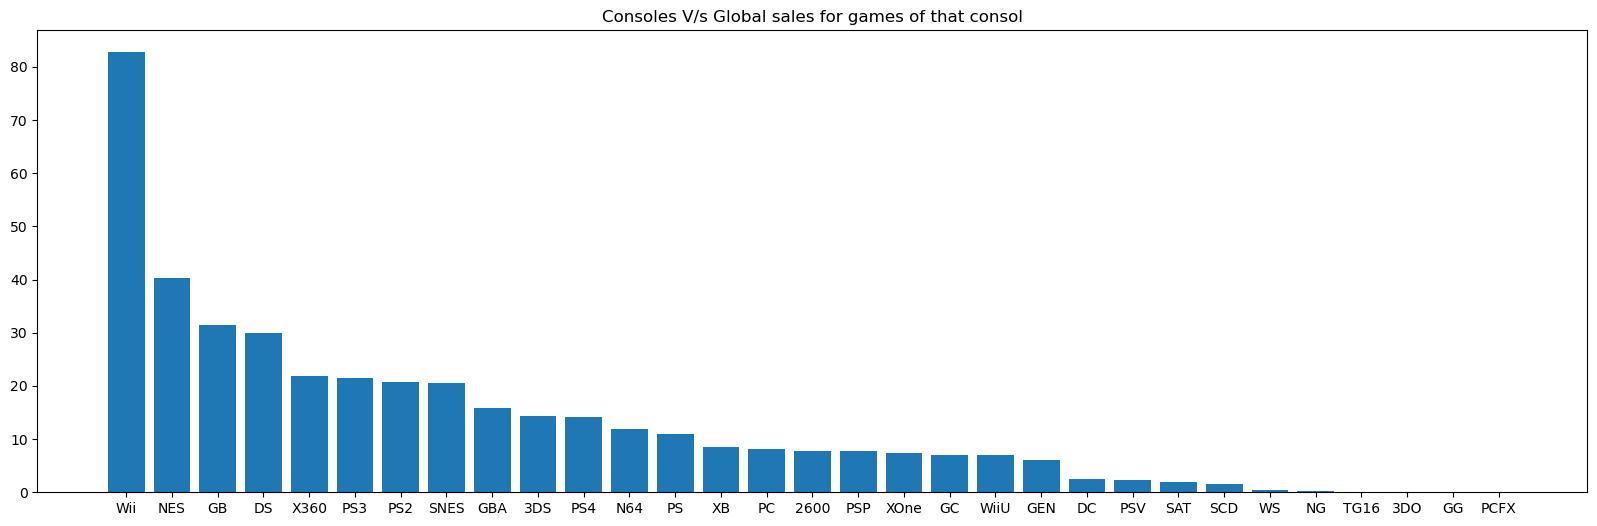

In [148]:
plt.figure(figsize=(20,6))
plt.bar(df["Platform"],df["Global_Sales"])
plt.title("Consoles V/s Global sales for games of that consol")
plt.show()

#### As we Can clearly infer from the above graph that the most popular consol is wii

## visualizing the trend of wii

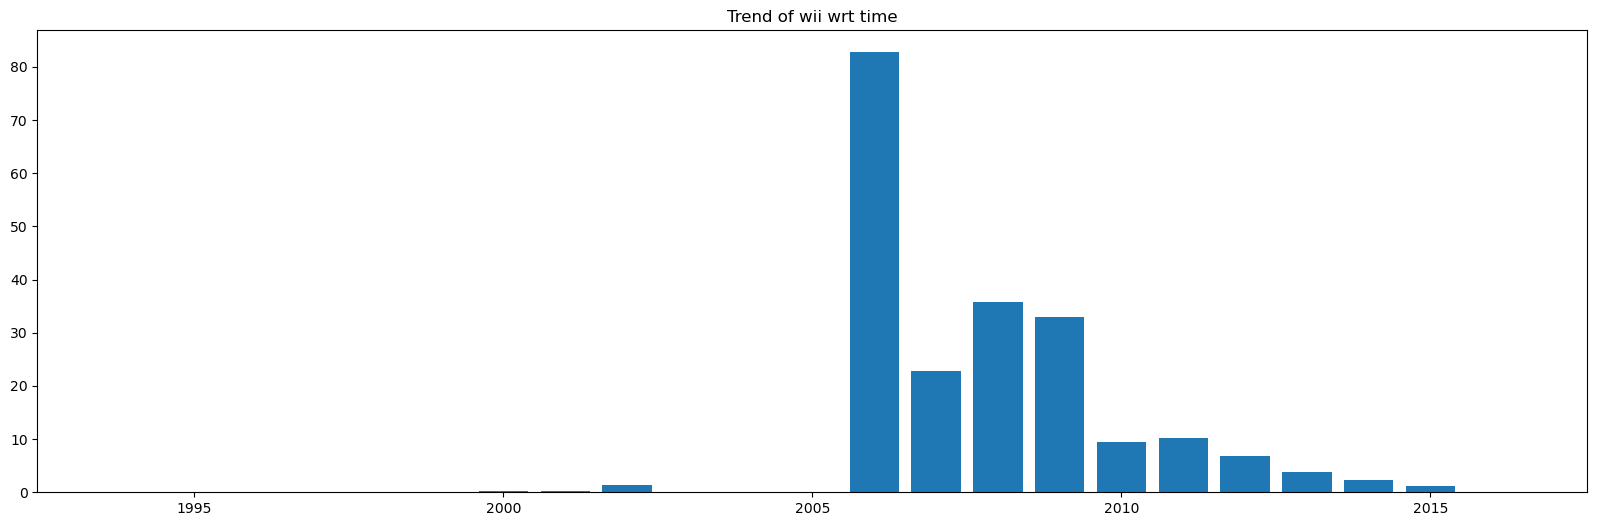

In [151]:
plt.figure(figsize=(20,6))
wi = df[df["Platform"]=="Wii"]
plt.bar(wi["Year"],wi["Global_Sales"])
plt.title("Trend of wii wrt time")
plt.show()

### Visualzing Sales-Market Capitalization of Consoles of top-5 most popular consols  (In the year 2006 as it has seen the max no of VG sales) 

In [169]:
yr = df[df["Year"]==2006]

In [170]:
yr

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
100,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31
...,...,...,...,...,...,...,...,...,...,...,...
16513,16516,Deal or No Deal,PC,2006.0,Misc,Focus Home Interactive,0.00,0.01,0.00,0.00,0.01
16520,16523,Tengai Makyo: Dai Yon no Mokushiroku,PSP,2006.0,Role-Playing,Hudson Soft,0.00,0.00,0.01,0.00,0.01
16523,16526,Style Book: Cinnamoroll,DS,2006.0,Misc,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16547,16550,Bookworm Deluxe,PC,2006.0,Puzzle,PopCap Games,0.01,0.00,0.00,0.00,0.01


In [196]:
wii_d = yr[yr["Platform"] =="Wii"]
wii_sum = wii_d["Global_Sales"].sum()

NES_d = yr[yr["Platform"] =="NES"]
NES_sum = NES_d["Global_Sales"].sum()

GB_d = yr[yr["Platform"] =="GB"]
GB_sum = GB_d["Global_Sales"].sum()
    
DS_d = yr[yr["Platform"] =="DS"]
DS_sum = DS_d["Global_Sales"].sum()

X360_d = yr[yr["Platform"] =="X360"]
X360_sum = X360_d["Global_Sales"].sum()

sales_2006_T5 = [wii_sum, NES_sum, GB_sum, DS_sum, X360_sum]
con = ["wii", "NES", "GB", "DS" , "X360"]

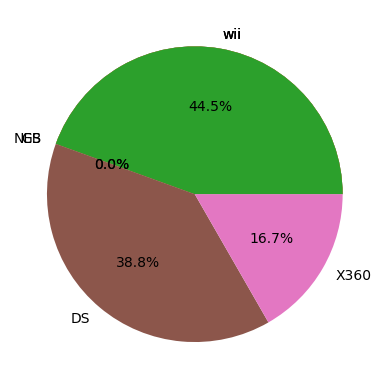

In [203]:
plt.pie(sales_2006_T5, labels =con,autopct ="%2.1f%%")
plt.show()

In [204]:
NES_sum

0.0